<h1 align='center'> 신호 및 시스템 실습 10</h1>

<p style="text-align: right"> 2021.5.20. (목)</p>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름: 장윤제  &nbsp;&nbsp;          학번: 20175334   &nbsp;&nbsp;         학과(전공): 스마트IoT
    
</div>

- Jupyter notebook에 대한 설명은 [The Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)을  참고하라.

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)
- Sympy의 복소수 관련 함수는 [sympy.functions.elementary.complexes](https://docs.sympy.org/latest/modules/functions/elementary.html#cbrt)를 참고하라.

* 제출 마감: 5월 22일 (토) 오후 6:00까지 최종본 제출


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_small_to_zero(X, atol=10e-15):
    X.real[np.isclose(X.real, 0, atol = atol)] = 0
    X.imag[np.isclose(X.imag, 0, atol = atol)] = 0
    
def sine_wave(A, f, phi, duration, fs):
    t = np.arange(0, duration, 1/fs)
    return t, A*np.sin(2*np.pi * f * t + phi)


def plot_signal_and_spectrum(x, X):
    plt.subplot(311)
    plt.stem(x)
    plt.xlabel("$n$")
    plt.ylabel("$x[n]$")
    plt.subplot(312)
    plt.stem(np.abs(X))
    plt.xlabel("$k$")
    plt.ylabel("$|X[k]|$")
    plt.subplot(313)
    plt.stem(np.angle(X))
    plt.xlabel("$k$")
    plt.ylim(-1.1*np.pi, 1.1*np.pi)
    plt.yticks([-np.pi, np.pi], ["-$\pi$", "$\pi$"])
    plt.ylabel(r"$\angle X[k]$")    
    plt.tight_layout()
    plt.show() 

def single_tone(duration, A, f, phi, fs=44100):
    t = np.arange(0, duration, 1/fs)
    return t, A * np.sin(2 * np.pi * f * t + phi)


def get_fade_window_2(duration=1, t_in=0.02, t_out=0.02, fs=44100):

    if t_in + t_out > duration:
        t_out = duration - t_in    
    Ts = 1 / fs
    t = np.arange(0, duration, Ts)
    fade_window = []
    for t_ in t:
        if t_ < t_in :
            fade_window.append(t_/t_in)
        elif t_ < (duration - t_out):
            fade_window.append(1.0)
        else:
            fade_window.append((duration-t_)/t_out)
    
    return t, np.array(fade_window)

def score_to_wave(score, key_no, tempo=100, fs=44100):
    wav = np.array([])
    for note in score:
        key = note[0]
        no = key_no[key]
        length = note[1] * 60 / tempo
        if no < 1:
            f = 0.
        else:
            f = 440.0 * (2 ** ((no-49)/12))
        t, tone = single_tone(length, 0.8, f, 0, fs)
        t, win = get_fade_window_2(length, 0.02, 0.02, fs)
        wav = np.append(wav, tone*win)
    return wav


key_no = {'R':0, 'C4': 40, 'D4':42, 'E4':44, 'F4':45, 
           'G4':47, 'A4': 49, 'B4': 51, 'C5':52}

In [2]:
fs = 8000
C_scale_2 = (('C4', 1), ('D4', 1), ('E4', 1), ('F4', 1), 
             ('G4', 1), ('A4', 1), ('B4', 1), ('C5', 1))

school_bell_sop_note = [('G4', 1), ('G4', 1), ('A4', 1), ('A4', 1), ('G4', 1), ('G4', 1), ('E4', 2),
                        ('G4', 1), ('G4', 1), ('E4', 1), ('E4', 1), ('D4', 3), ('R', 1),
                       ('G4', 1), ('G4', 1), ('A4', 1), ('A4', 1), ('G4', 1), ('G4', 1), ('E4', 2),
                       ('G4', 1), ('E4', 1), ('D4', 1), ('E4', 1), ('C4', 3), ('R', 1)]
school_bell_sop_wave = score_to_wave(school_bell_sop_note, key_no, tempo=150, fs=fs)

In [3]:
from IPython.display import Audio
Audio(school_bell_sop_wave, rate=fs)


####  문제 1.

자신이 만든 tone music의 크기 spectrum을 그래프로 그리는 과정을 상세히 작성하라.

##### 1.1

sound data를 $x[n]$이라고 하자. $x[n]$의 샘플의 숫자를 적어라.

**답**: 102400

In [4]:
x = school_bell_sop_wave
x.size

102400

In [48]:
_/fs        #12.8초

12.8

In [5]:
import scipy.io.wavfile as wavfile
#wavfile.write('scholl_bell.wav', fs, x)

In [7]:
x = x/x.max()*0.8*32768
x = x.astype(np.int16)
x

array([  0,  49, 189, ...,   0,   0,   0], dtype=int16)

In [8]:
wavfile.write('scholl_bell.wav', fs, x)

In [9]:
rate,xx = wavfile.read('scholl_bell.wav')

In [10]:
xx.size, rate

(102400, 8000)

##### 1.2
$x[n]$의 energy $E_x$를 구하라.

$$E_x = \sum_{n=0}^{N-1} |x[n]|^2$$

In [56]:
Ex = np.sum(x**2)
Ex

29081.65617835737

##### 1.3

np.fft.rfft()를 사용하여 sound data의 이산 푸리에 변환을 구하라.


In [13]:
X = np.fft.fft(x)
Xr = np.fft.rfft(x)

##### 1.4
$X[k]$의 energy $E_X$를 구하라.

$$E_X = \sum_{k=0}^{N-1} |X[k]|^2$$

In [14]:
X.size

102400

In [15]:
X[:5]   # 복소수

array([  6803.            +0.j        ,   1224.83521219  +822.46790478j,
       -13439.22305458+10516.25444487j,    117.4948106  +1878.60119024j,
       -10919.52286265 -5179.06292034j])

In [16]:
EX = np.sum(X*X.conj()).real
EX

3.197402597128909e+18

In [17]:
z=3+4j
z*z.conjugate()   #복소수 절댓값의 제곱!

(25+0j)

##### 1.5
$E_x$와 $E_X$ 사이의 관계식을 구하라.

In [62]:
EX / Ex # =   𝑥[𝑛] 의 샘플의 숫자

102400.00000000001

##### 1.6
$E_x$와 $E_X$ 사이의 관계식에서 어떤 사실을 알 수 있는지 적어라.

Parseval의 정리 성립

##### 1.7
$X[k]$가 complex symmetic인 것을 보여라.

In [63]:
X[1], X[-1]

((0.036793323651507226+0.024874526703908884j),
 (0.03679332365152103-0.024874526703922824j))

In [64]:
X[2], X[-2]

((-0.4086973840328616+0.3200316414688249j),
 (-0.4086973840328603-0.3200316414688302j))

In [34]:
b = np.array([1,2,3,4,5,6,7])
B = np.fft.fft(b)
B

array([28. +0.j        , -3.5+7.26782489j, -3.5+2.79115686j,
       -3.5+0.79885216j, -3.5-0.79885216j, -3.5-2.79115686j,
       -3.5-7.26782489j])

##### 1.8
$x[n]$이 16-bit signed integer로 표현되었다. 전체 데이터 양을 bytes로 표현하라. 

  

**답** : $2N$ bytes. 여기에서 $N$은 $x[n]$의 길이

##### 1.9
$X[k]$를 표현하는데 필요한 샘플의 개수를 실수의 개수로 표현하라. 

**답** : $N$ 개, 여기에서 $N$은 $x[n]$의 길이

##### 1.10
복소수를 np.complex128로 표현한다면 $X[k]$를 표현하는데 필요한 전체 데이터 양을 bytes로 표현하라. 
  
**답** : $8N$ bytes, 여기에서 $N$은 $x[n]$의 길이

##### 1.12

np.fft.rfft()를 사용하여 구한 이산 푸리에 변환의 샘플의 개수를 구하라.


In [65]:
x.size

102400

In [66]:
X = np.fft.rfft(x)

In [67]:
Xr = np.fft.rfft(x)

In [68]:
Xr.size

51201

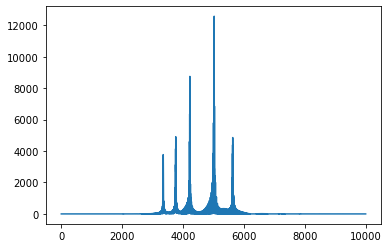

In [69]:
Xrm = np.abs(Xr)
plt.plot(Xrm[:10000])
plt.show()

In [70]:
# 주파수 분해능
df = fs / 1024
df

7.8125

C:\Users\jjw12\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7560: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


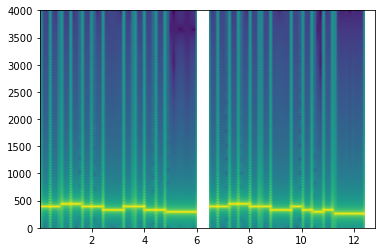

In [71]:
spectrum, freqs, t, im = plt.specgram(x, NFFT=1024, Fs=fs, mode='magnitude')
plt.show()

C:\Users\jjw12\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7558: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


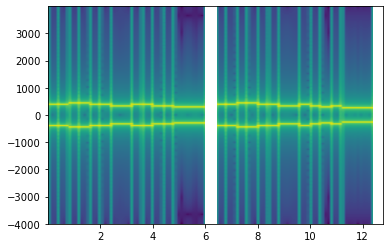

In [72]:
plt.specgram(x, 1024, fs, sides='twosided')
plt.show()

In [73]:
%matplotlib qt
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
t_, f_ = np.meshgrid(t, freqs[:200])
ax.plot_surface(t_, f_, spectrum[:200,:], rstride=1, cstride=1, cmap='hot')
plt.show()

In [74]:
Xr2 = Xr.copy()
Xr2[Xrm < 100] = 0
x2 = np.fft.irfft(Xr2)              #역푸리에변환

In [75]:
Audio(x2, rate=fs)

In [76]:
Xr2[Xrm >= 100].size

1145

In [77]:
## 1145 개의 샘플을 표현하기 위해서 필요한 byte 수(complex128 사용시)
1145 / Xr.size      #원래 신호를 푸리에변환을 해서 2%

0.022362844475693835

#### 문제 2: 이번 실습을 통해서 새로 알게된 내용을 적어라.

lossy compression   손실압축

ex) 

Audio = AAC, MP3

Video = MPEG-2(DCT:Cosine 변환)



PCA